I have converted the following so that it works for the timeframe
- Descriptive statistics for conversation length
- Distribution of conversations (and all plots that belong there)
- Distribution of conversation durations
- Airline specific distribution of conversations
- Airline specific number of tweets, number of tweets as replies

I am uncertain whether these ones are right
- The log plot
- Airline specific average response times (the last thing in this file)

I do not know how to adjust the code of the following things
- Number of conversations
- Airline specific number of conversations
- Airline specific descriptive statistics for conversation length

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='',
    database='jbg030'
)

cursor = connection.cursor()


# Timeframe

In [27]:
# Input for now is year-day-month
timeframe = {'start': ['2019', '10', '06'], 'end':['2020', '01', '01']}
timeframe_start = f'{timeframe['start'][2]}/{timeframe['start'][1]}/{timeframe['start'][0]}'
timeframe_end = f'{timeframe['end'][2]}/{timeframe['end'][1]}/{timeframe['end'][0]}'

start_date = pd.to_datetime(timeframe_start)
end_date = pd.to_datetime(timeframe_end)

print(start_date, end_date)

2019-06-10 00:00:00 2020-01-01 00:00:00


# General conversation statistics:
Statistics involving all conversation data

- [Go to Number of conversations](#Number-of-conversations)
- [Go to Descriptive statistics for conversations length](#Descriptive-statistics-for-conversations-length)
- [Go to Distribution of conversations](#Distribution-of-conversations)
- [Go to Distribution of conversation durations](#Distribution-of-conversation-durations)


### Number of conversations

[Back to General conversation statistics](#General-conversation-statistics)


In [16]:
conv_count = "SELECT COUNT(*) FROM conversations"
cursor.execute(conv_count)

num_of_conv = cursor.fetchone()

print("The number of conversations is", num_of_conv[0])


The number of conversations is 1090440


**I don't know how I could change this to the right timeframe**

### Descriptive statistics for conversations length

[Back to General conversation statistics](#General-conversation-statistics)


In [17]:
conv_length = "SELECT length, start FROM conversations"

df = pd.read_sql(conv_length, connection)

df['start'] = pd.to_datetime(df['start'], unit='ms')

mask = (df['start'] >= start_date) & (df['start'] <= end_date)
df = df.loc[mask]

descriptive_conv_length_stats = df['length'].describe() # Compute the descriptive statistics

descriptive_conv_length_stats_df = descriptive_conv_length_stats.to_frame().T # Represent it as a data frame

descriptive_conv_length_stats_df = descriptive_conv_length_stats_df.drop(columns="count") # Remove count as we already have it above

descriptive_conv_length_stats_df


C:\Users\20233498\AppData\Local\Temp\ipykernel_26692\876602836.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(conv_length, connection)


,mean,std,min,25%,50%,75%,max
length,2.51156,1.826606,1.0,2.0,2.0,3.0,46.0


### Distribution of conversations

[Back to General conversation statistics](#General-conversation-statistics)

In [28]:
conv_start = "SELECT start FROM conversations"

df_start = pd.read_sql(conv_start, connection)

df_start['start'] = pd.to_datetime(df_start['start'], unit='ms') # Convert timestamp to a date time format

df_start['hour'] = df_start['start'].dt.hour # Extract the hour when the conv starts

df_start['day_of_month'] = df_start['start'].dt.day # Extract the day of the month

df_start['day_of_week'] = df_start['start'].dt.dayofweek # Extract the day when the conv starts

df_start['month'] = df_start['start'].dt.month # Extract the month when the conv starts

mask_start = (df_start['start'] >= start_date) & (df_start['start'] <= end_date)
df_start = df_start.loc[mask_start]

C:\Users\20233498\AppData\Local\Temp\ipykernel_26692\1011318655.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_start = pd.read_sql(conv_start, connection)


hour
0     14675
1     16446
2     13193
3     20903
4     11332
5     12271
6     16133
7     18798
8     23900
9     26650
10    37646
11    30049
12    32070
13    35229
14    30621
15    35103
16    34114
17    28980
18    29576
19    27627
20    26463
21    26786
22    24632
23    23533
Name: count, dtype: int64


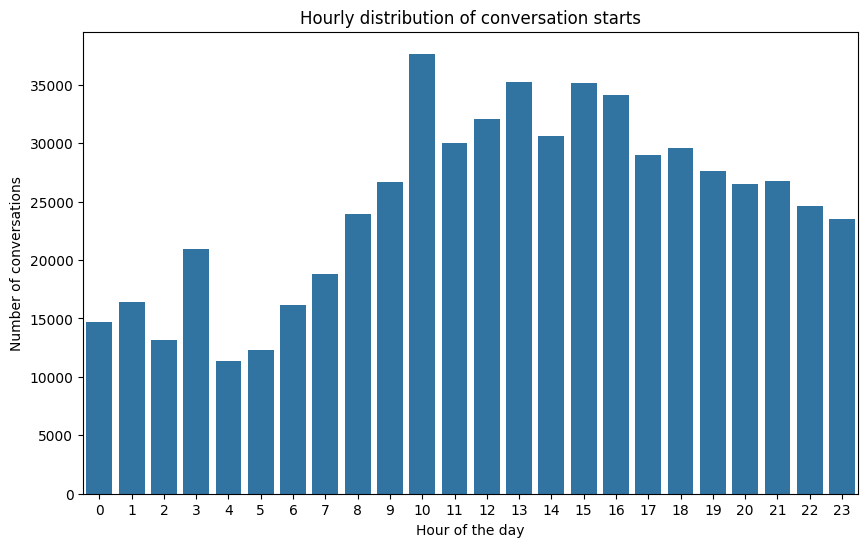

In [9]:
# Hourly distribution of conversation starts

hourly_distribution = df_start['hour'].value_counts().sort_index() # Count the number of conversations starting at each hour

print(hourly_distribution)
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_distribution.index, y=hourly_distribution.values)
plt.xlabel('Hour of the day')
plt.ylabel('Number of conversations')
plt.title('Hourly distribution of conversation starts')
plt.xticks(range(24))
plt.show()

day_of_month
1      5526
2      5251
3      5035
4      5308
5      6667
6      6020
7      5035
8      4641
9      4435
10     4418
11     6497
12     5654
13     4651
14     4969
15     4728
16     8184
17     7539
18     5765
19     5081
20     6689
21     6637
22     5113
23     6987
24     9161
25    10056
26     8097
27     8034
28     7232
29     7465
30     7456
31     9728
Name: count, dtype: int64


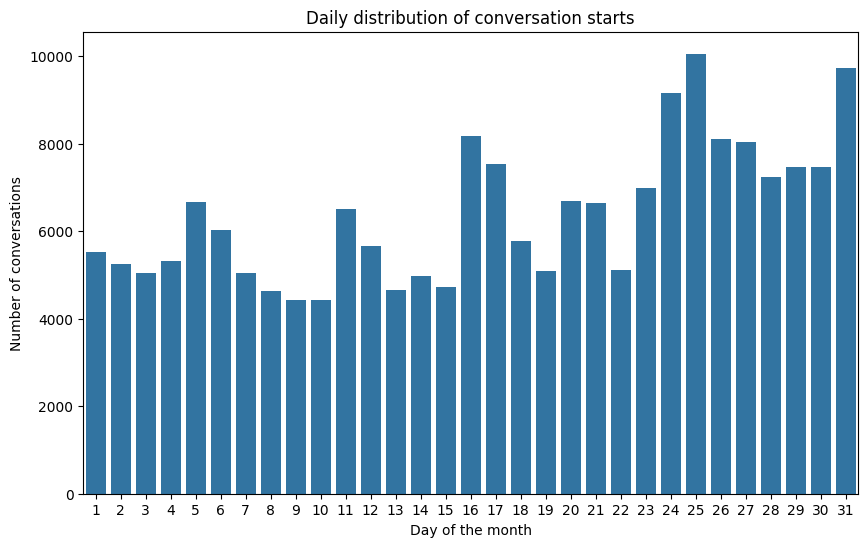

In [19]:
# Daily distribution of conversation starts

daily_distribution = df_start['day_of_month'].value_counts().sort_index() # Count the number of conversations starting on each day of the week

print(daily_distribution)
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_distribution.index, y=daily_distribution.values)
plt.xlabel('Day of the month')
plt.ylabel('Number of conversations')
plt.title('Daily distribution of conversation starts')
plt.xticks(range(31))
plt.show()

day_of_week
0    86173
1    87973
2    78211
3    92709
4    83764
5    82474
6    85426
Name: count, dtype: int64


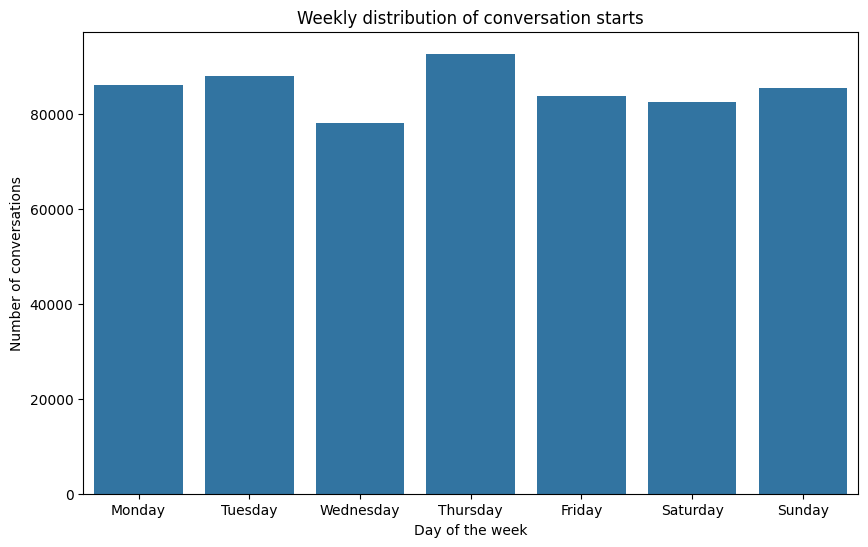

In [10]:
# Weekly distribution of conversation starts 

weekly_distribution = df_start['day_of_week'].value_counts().sort_index() # Count the number of conversations starting on each day of the week

print(weekly_distribution)
plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_distribution.index, y=weekly_distribution.values)
plt.xlabel('Day of the week')
plt.ylabel('Number of conversations')
plt.title('Weekly distribution of conversation starts')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()


month
1          0
2          0
3          0
4          0
5          0
6      84120
7     136533
8     103454
9     100819
10     33533
11     88505
12     82368
Name: count, dtype: int64


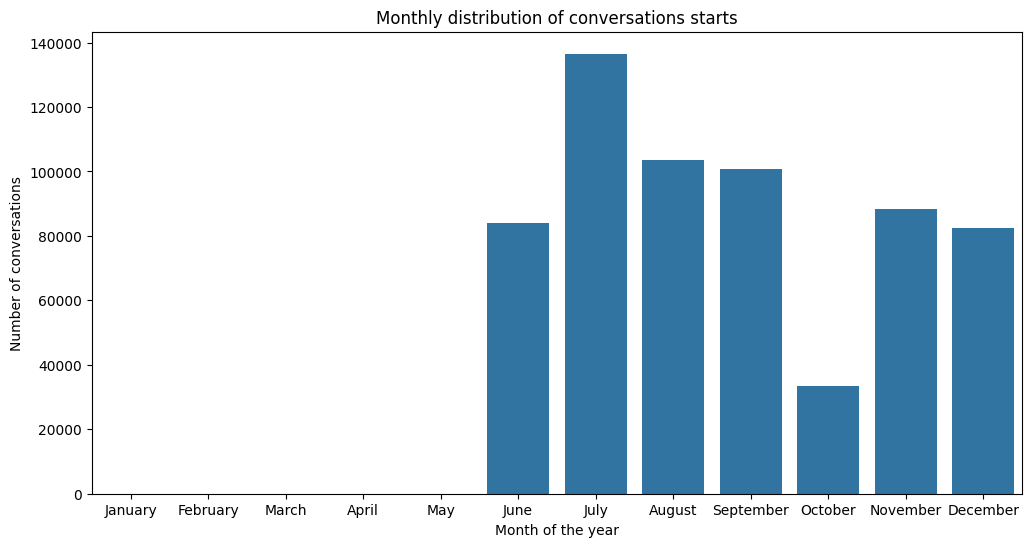

In [30]:
# Monthly distribution of conversations starts by the month of the year

month_order = [4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3]

monthly_distribution = df_start['month'].value_counts().reindex(month_order, fill_value=0).sort_index() # Count the number of conversations starting on each month
print(monthly_distribution)

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_distribution.index, y=monthly_distribution.values)
plt.xlabel('Month of the year')
plt.ylabel('Number of conversations')
plt.title('Monthly distribution of conversations starts')
plt.xticks(range(12), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

## Distribution of conversation durations

[Back to General conversation statistics](#General-conversation-statistics)

In [31]:
conv_duration = "SELECT start, end FROM conversations"

df_duration = pd.read_sql(conv_duration, connection)

df_duration['start'] = pd.to_datetime(df_duration['start'], unit='ms') # Convert timestamp to date time format
df_duration['end'] = pd.to_datetime(df_duration['end'], unit='ms') # Convert timestamp to date time format

mask_duration = (df_duration['start'] >= start_date) & (df_duration['start'] <= end_date)
df_duration = df_duration.loc[mask_duration]

df_duration['duration'] = (df_duration['end'] - df_duration['start']).dt.total_seconds() # Compute the duration of conversations in seconds

duration_desc_stats = df_duration['duration'].describe() # Compute the descriptive statistics of conversations durations
df_duration_desc_stats = duration_desc_stats.to_frame().T
df_duration_desc_stats = df_duration_desc_stats.drop(columns="count")

df_duration_desc_stats

C:\Users\20233498\AppData\Local\Temp\ipykernel_26692\3598401944.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_duration = pd.read_sql(conv_duration, connection)


,mean,std,min,25%,50%,75%,max
duration,90734.701174,610525.641613,0.0,397.487,4500.566,34175.95575,2.420387e+07


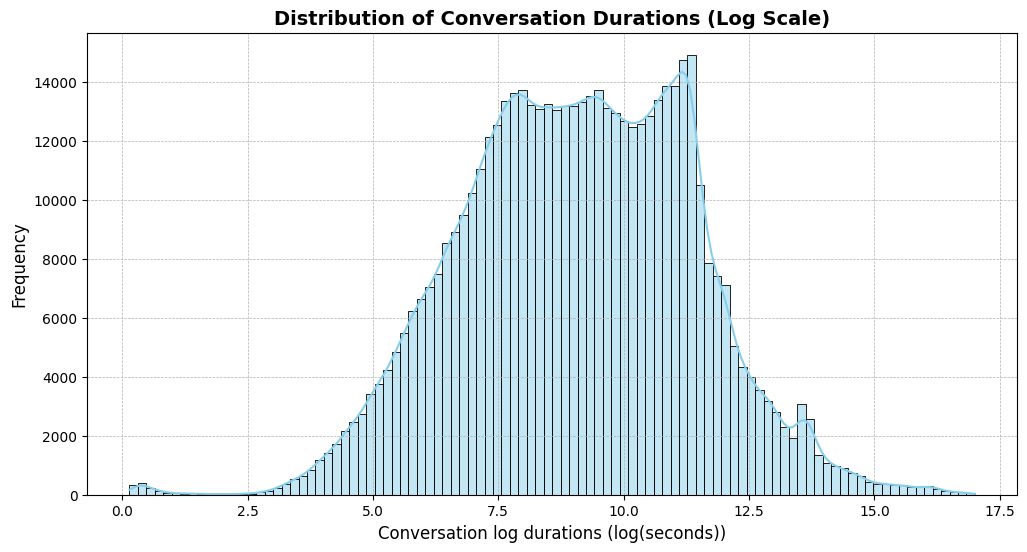

In [32]:
non_zero_durations = df_duration[df_duration['duration'] > 0]['duration'] # Filter out non-zero durations

log_durations = np.log1p(non_zero_durations) # Add a small constant befor log transformations to handle near-zero values more effectively

plt.figure(figsize=(12, 6))
sns.histplot(log_durations, bins=100, kde=True, color='skyblue')
plt.xlabel('Conversation log durations (log(seconds))', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Conversation Durations (Log Scale)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Airline specific conversation statistics
Statistics involving our sppecific airline and our competitors

- [Go to Airline specific number of conversations](#Airline-specific-number-of-conversations)
- [Go to Airline specific descriptive statistics for conversation length](#Airline-specific-descriptive-statistics-for-conversation-length)
- [Go to Airline specific distribution of conversations](#Airline-specific-distribution-of-conversations)
- [Go to Airline specific number of tweets, number of tweets as replies and average response times](#Airline-specific-number-of-tweets-number-of-tweets-as-replies-and-average-response-times)



### Airline specific number of conversations

[Back to Airline specific conversation statistics](#Airline-specific-conversation-statistics)

**Don't know how to do this with timestamp**

(102638,)
(40144,)
(13683,)
(9305,)


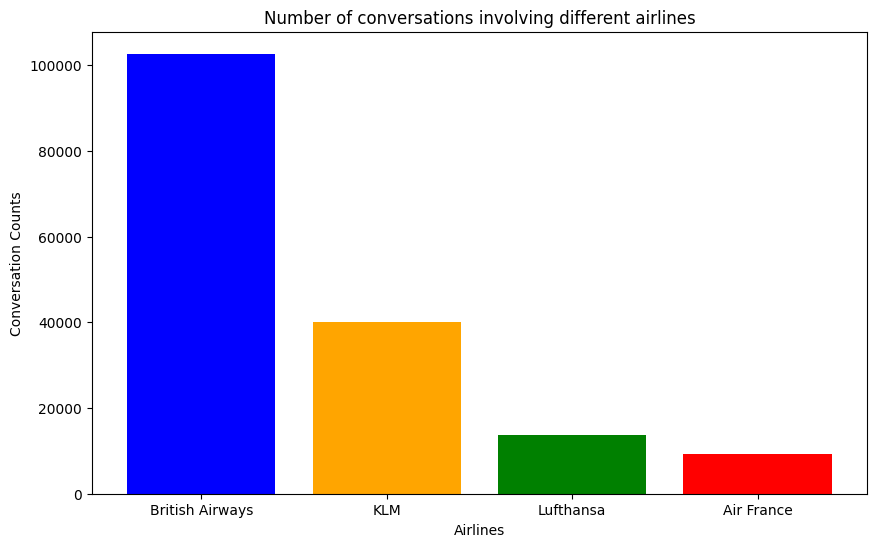

In [34]:
brit_airways_conv_count_query = """ 
SELECT COUNT(*)
FROM conversations
WHERE airline LIKE '%British_Airways%';
"""
KLM_conv_count_query = """ 
SELECT COUNT(*)
FROM conversations
WHERE airline LIKE '%KLM%';
"""
lufthansa_conv_count_query = """ 
SELECT COUNT(*)
FROM conversations
WHERE airline LIKE '%Lufthansa%';
"""
air_france_conv_count_query = """ 
SELECT COUNT(*)
FROM conversations
WHERE airline LIKE '%AirFrance%';
"""
def get_count(query):
    cursor = connection.cursor()
    cursor.execute(query)
    result = cursor.fetchone()
    return result[0]

brit_airways_conv_count = get_count(brit_airways_conv_count_query)
KLM_conv_count = get_count(KLM_conv_count_query)
lufthansa_conv_count = get_count(lufthansa_conv_count_query)
air_france_conv_count = get_count(air_france_conv_count_query)

airlines = ['British Airways', 'KLM', 'Lufthansa', 'Air France']
counts = [brit_airways_conv_count, KLM_conv_count, lufthansa_conv_count, air_france_conv_count]

plt.figure(figsize=(10, 6))
plt.bar(airlines, counts, color=['blue', 'orange', 'green', 'red'])

plt.title('Number of conversations involving different airlines')
plt.xlabel('Airlines')
plt.ylabel('Conversation Counts')

plt.show()

### Airline specific descriptive statistics for conversation length

[Back to Airline specific conversation statistics](#Airline-specific-conversation-statistics)

In [ ]:
def compute_descriptive_stats(query, connection):
    df = pd.read_sql(query, connection)
    
    descriptive_stats = df['length'].describe() # Compute descriptive statistics

    descriptive_stats_df = descriptive_stats.to_frame().T # Convert to a data frame

    return descriptive_stats_df


In [ ]:
british_airways_conv_length_query = """
SELECT length 
FROM conversations 
WHERE airline LIKE '%British_Airways%'
"""
KLM_conv_length_query = """ 
SELECT length
FROM conversations
WHERE airline LIKE '%KLM%';
"""
lufthansa_conv_length_query = """ 
SELECT length
FROM conversations
WHERE airline LIKE '%Lufthansa%';
"""
air_france_conv_length_query = """ 
SELECT length
FROM conversations
WHERE airline LIKE '%AirFrance%';
"""

descriptive_british_airways_conv_length_stats_df = compute_descriptive_stats(british_airways_conv_length_query, connection)
descriptive_KLM_conv_length_stats_df = compute_descriptive_stats(KLM_conv_length_query, connection)
descriptive_lufthansa_conv_length_stats_df = compute_descriptive_stats(lufthansa_conv_length_query, connection)
descriptive_air_france_conv_length_stats_df = compute_descriptive_stats(air_france_conv_length_query, connection)

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_88915/2978879652.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)
/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_88915/2978879652.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)
/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_88915/2978879652.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)
/var/folders/_1/64lzdpgn2472v4xdvl_3y

In [ ]:
descriptive_british_airways_conv_length_stats_df

,count,mean,std,min,25%,50%,75%,max
length,102638.0,3.211754,1.976621,1.0,2.0,2.0,4.0,44.0


In [ ]:
descriptive_KLM_conv_length_stats_df

,count,mean,std,min,25%,50%,75%,max
length,40144.0,3.42081,2.337621,1.0,2.0,3.0,4.0,54.0


In [ ]:
descriptive_air_france_conv_length_stats_df

,count,mean,std,min,25%,50%,75%,max
length,9305.0,2.933799,1.842207,1.0,2.0,2.0,3.0,29.0


In [ ]:
descriptive_lufthansa_conv_length_stats_df

,count,mean,std,min,25%,50%,75%,max
length,13683.0,3.39582,1.904883,1.0,2.0,3.0,4.0,19.0


### Airline specific distribution of conversations

[Back to Airline specific conversation statistics](#Airline-specific-conversation-statistics)

In [35]:
def extract_time(query, connection):

    df = pd.read_sql(query, connection)

    df['start'] = pd.to_datetime(df['start'], unit='ms') # Convert timestamp to a date time format

    df['hour'] = df['start'].dt.hour # Extract the hour when the conv starts

    df['day_of_month'] = df['start'].dt.day # Extract the day of the month

    df['day_of_week'] = df['start'].dt.dayofweek # Extract the day when the conv starts

    df['month'] = df['start'].dt.month # Extract the month when the conv starts

    mask_df = (df['start'] >= start_date) & (df['start'] <= end_date)
    df = df.loc[mask_df]

    return df
    

In [36]:
british_airways_conv_start_query = """
SELECT start 
FROM conversations
WHERE airline LIKE '%British_Airways%'
"""
KLM_conv_start_query = """ 
SELECT start
FROM conversations
WHERE airline LIKE '%KLM%';
"""
lufthansa_conv_start_query = """ 
SELECT start
FROM conversations
WHERE airline LIKE '%Lufthansa%';
"""
air_france_conv_start_query = """ 
SELECT start
FROM conversations
WHERE airline LIKE '%AirFrance%';
"""

In [37]:
# Create data farmes with extracted time units
british_airways_conv_start = extract_time(british_airways_conv_start_query, connection)
KLM_conv_start = extract_time(KLM_conv_start_query, connection)
lufthansa_conv_start = extract_time(lufthansa_conv_start_query, connection)
air_france_conv_start = extract_time(air_france_conv_start_query, connection)


C:\Users\20233498\AppData\Local\Temp\ipykernel_26692\2400301918.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)
C:\Users\20233498\AppData\Local\Temp\ipykernel_26692\2400301918.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)
C:\Users\20233498\AppData\Local\Temp\ipykernel_26692\2400301918.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)
C:\Users\20233498\AppData\Local\Temp\ipykernel_26692\2400301918.py:3: Use

In [38]:
# Count the number of conversations starting each hour
british_airways_hourly_distribution = british_airways_conv_start['hour'].value_counts().sort_index() 
KLM_hourly_distribution = KLM_conv_start['hour'].value_counts().sort_index() 
lufthansa_hourly_distribution = lufthansa_conv_start['hour'].value_counts().sort_index() 
air_france_hourly_distribution = air_france_conv_start['hour'].value_counts().sort_index()

# Concatenate data frames into one data frame
airlines_hourly_distribution_df = pd.concat([british_airways_hourly_distribution, KLM_hourly_distribution, lufthansa_hourly_distribution, air_france_hourly_distribution], axis = 1)
airlines_hourly_distribution_df.columns = ['British Airways', 'KLM', 'Lufthansa', 'Air France']

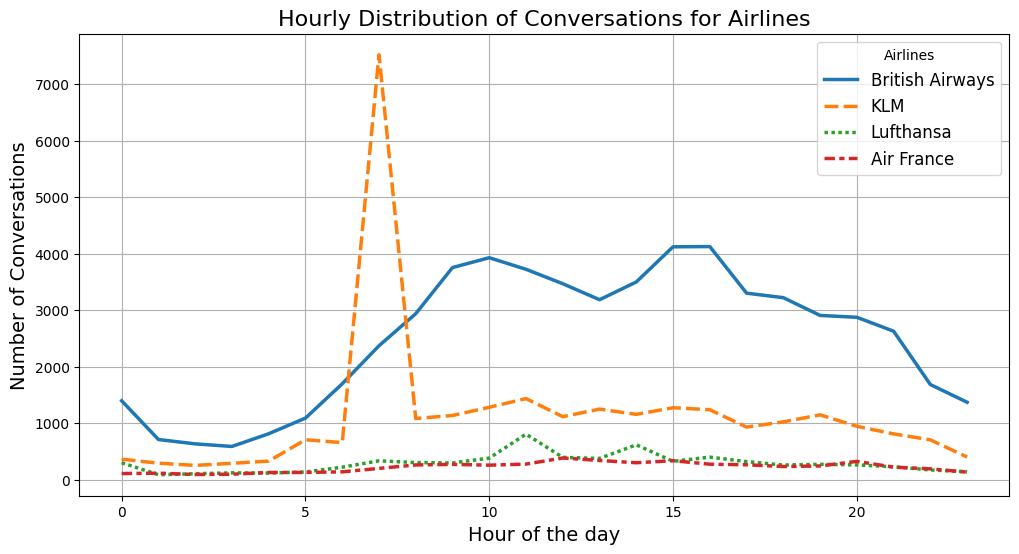

In [39]:
# Plot the hourly distribution data frame
plt.figure(figsize=(12, 6))
sns.lineplot(data=airlines_hourly_distribution_df, linewidth=2.5)

plt.title('Hourly Distribution of Conversations for Airlines', fontsize=16)
plt.xlabel('Hour of the day', fontsize=14)
plt.ylabel('Number of Conversations', fontsize=14)
plt.legend(title='Airlines', loc='upper right', fontsize=12)
plt.grid(True)

plt.show()

In [40]:
# Count the number of conversations starting on each day of the month
british_airways_daily_distribution = british_airways_conv_start['day_of_month'].value_counts().sort_index() 
KLM_daily_distribution = KLM_conv_start['day_of_month'].value_counts().sort_index() 
lufthansa_daily_distribution = lufthansa_conv_start['day_of_month'].value_counts().sort_index() 
air_france_daily_distribution = air_france_conv_start['day_of_month'].value_counts().sort_index()

# Concatenate data frames into one data frame
airlines_daily_distribution_df = pd.concat([british_airways_daily_distribution, KLM_daily_distribution, lufthansa_daily_distribution, air_france_daily_distribution], axis = 1)
airlines_daily_distribution_df.columns = ['British Airways', 'KLM', 'Lufthansa', 'Air France']

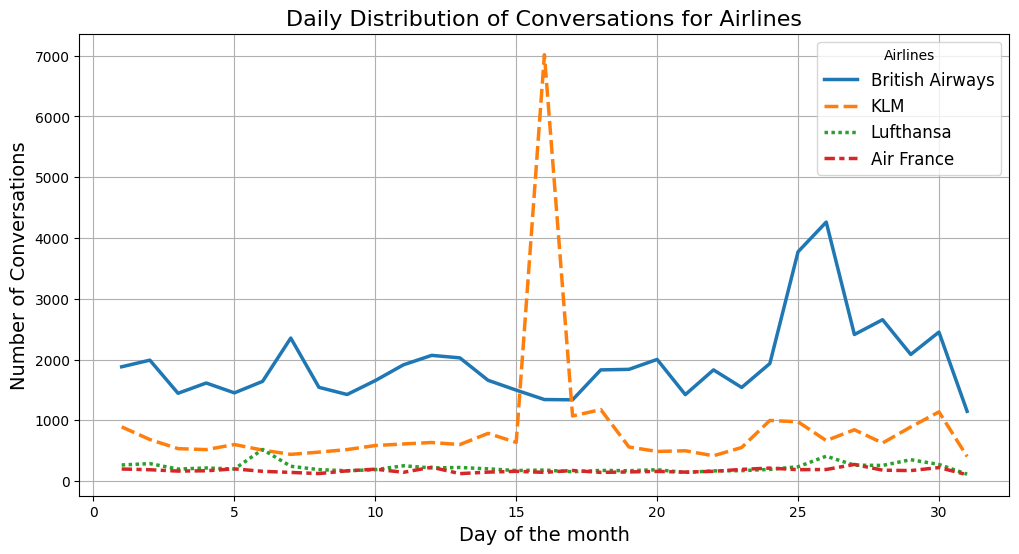

In [41]:
# Plot the daily distribution data frame
plt.figure(figsize=(12, 6))
sns.lineplot(data=airlines_daily_distribution_df, linewidth=2.5)

plt.title('Daily Distribution of Conversations for Airlines', fontsize=16)
plt.xlabel('Day of the month', fontsize=14)
plt.ylabel('Number of Conversations', fontsize=14)
plt.legend(title='Airlines', loc='upper right', fontsize=12)
plt.grid(True)

plt.show()

In [42]:
# Count the number of conversations starting each day of the week
british_airways_weekly_distribution = british_airways_conv_start['day_of_week'].value_counts().sort_index() 
KLM_weekly_distribution = KLM_conv_start['day_of_week'].value_counts().sort_index() 
lufthansa_weekly_distribution = lufthansa_conv_start['day_of_week'].value_counts().sort_index() 
air_france_weekly_distribution = air_france_conv_start['day_of_week'].value_counts().sort_index()

# Concatenate data frames into one data frame
airlines_weekly_distribution_df = pd.concat([british_airways_weekly_distribution, KLM_weekly_distribution, lufthansa_weekly_distribution, air_france_weekly_distribution], axis = 1)
airlines_weekly_distribution_df.columns = ['British Airways', 'KLM', 'Lufthansa', 'Air France']

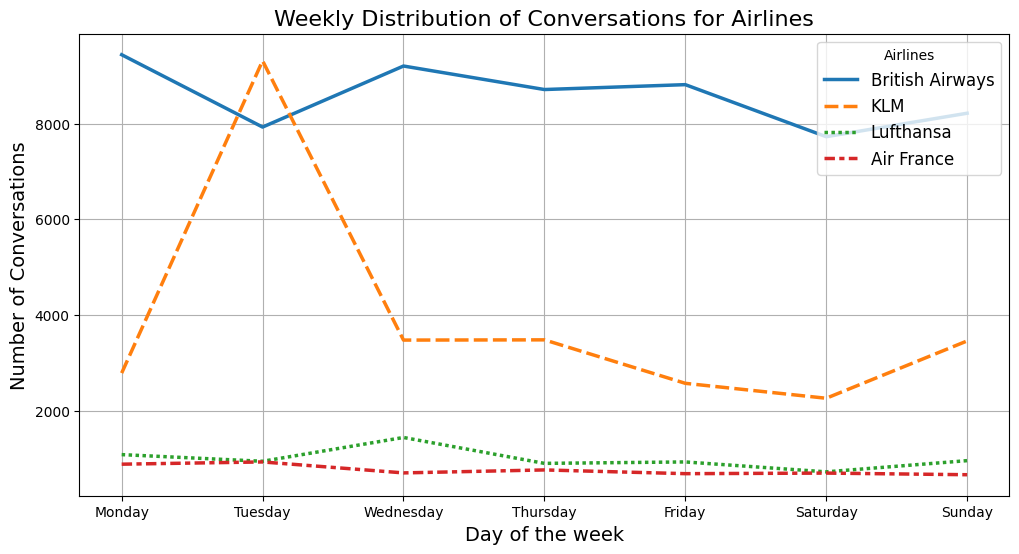

In [43]:
# Plot the hourly distribution data frame
plt.figure(figsize=(12, 6))
sns.lineplot(data=airlines_weekly_distribution_df, linewidth=2.5)

plt.title('Weekly Distribution of Conversations for Airlines', fontsize=16)
plt.xlabel('Day of the week', fontsize=14)
plt.ylabel('Number of Conversations', fontsize=14)
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(title='Airlines', loc='upper right', fontsize=12)
plt.grid(True)

plt.show()

In [44]:
# Count the number of conversations starting each day of the week
british_airways_monthly_distribution = british_airways_conv_start['month'].value_counts().reindex(range(1, 13), fill_value=0).sort_index() 
KLM_monthly_distribution = KLM_conv_start['month'].value_counts().reindex(range(1, 13), fill_value=0).sort_index() 
lufthansa_monthly_distribution = lufthansa_conv_start['month'].value_counts().reindex(range(1, 13), fill_value=0).sort_index() 
air_france_monthly_distribution = air_france_conv_start['month'].value_counts().reindex(range(1, 13), fill_value=0).sort_index()

# Concatenate data frames into one data frame
airlines_monthly_distribution_df = pd.concat([british_airways_monthly_distribution, KLM_monthly_distribution, lufthansa_monthly_distribution, air_france_monthly_distribution], axis = 1)
airlines_monthly_distribution_df.columns = ['British Airways', 'KLM', 'Lufthansa', 'Air France']

In [45]:
airlines_monthly_distribution_df

,British Airways,KLM,Lufthansa,Air France
month,,,,
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,6696,2875,1103,638
7,13639,12475,1392,1052
8,12957,2400,1103,699
9,9685,3783,1150,872


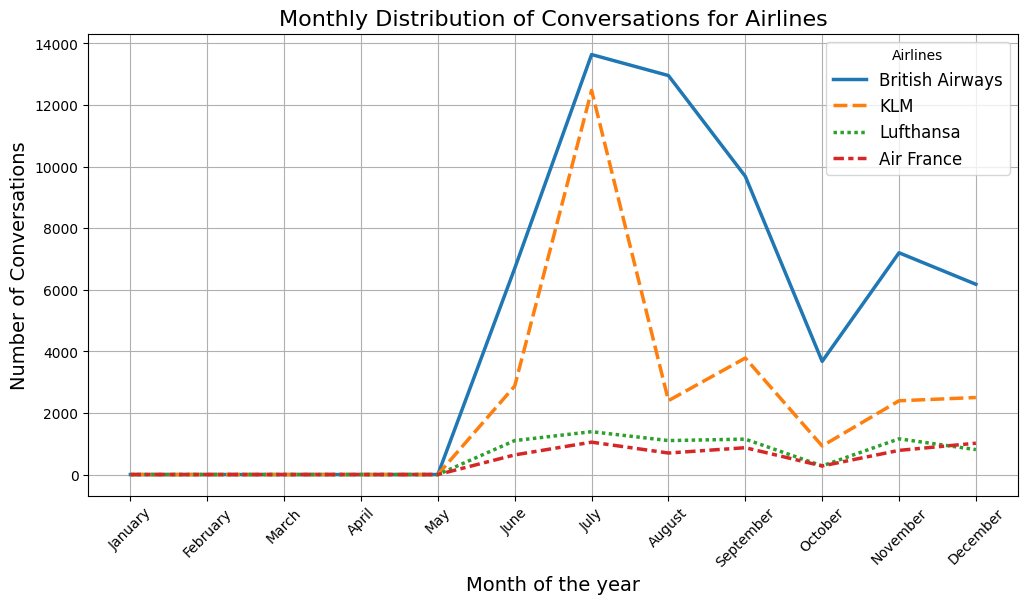

In [46]:
# Plot the monthly distribution data frame
plt.figure(figsize=(12, 6))
sns.lineplot(data=airlines_monthly_distribution_df, linewidth=2.5)

plt.title('Monthly Distribution of Conversations for Airlines', fontsize=16)
plt.xlabel('Month of the year', fontsize=14)
plt.ylabel('Number of Conversations', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],rotation=45)
plt.legend(title='Airlines', loc='upper right', fontsize=12)
plt.grid(True)

plt.show()

### Airline specific number of tweets, number of tweets as replies and average response times

[Back to Airline specific conversation statistics](#Airline-specific-conversation-statistics)

In [48]:
# Load data from the databases
conversations = pd.read_sql('SELECT conversation_id, airline FROM conversations', connection)
tweets = pd.read_sql('SELECT id, user_id, timestamp_ms, in_reply_to_status_id FROM tweets', connection)
hasher = pd.read_sql('SELECT conversation_id, id FROM hasher', connection)

merged_data = hasher.merge(tweets, on='id').merge(conversations, on='conversation_id') # Merge data into one table

merged_data['timestamp_ms'] = pd.to_datetime(merged_data['timestamp_ms'], unit='ms') # Convert timestamp to date time format

mask_merge = (merged_data['timestamp_ms'] >= start_date) & (merged_data['timestamp_ms'] <= end_date)
merged_data = merged_data.loc[mask_merge]

british_airways_user_id = 18332190
KLM_user_id = 56377143
lufthansa_user_id = 124476322
air_france_user_id = 106062176

C:\Users\20233498\AppData\Local\Temp\ipykernel_26692\2835825590.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  conversations = pd.read_sql('SELECT conversation_id, airline FROM conversations', connection)
C:\Users\20233498\AppData\Local\Temp\ipykernel_26692\2835825590.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tweets = pd.read_sql('SELECT id, user_id, timestamp_ms, in_reply_to_status_id FROM tweets', connection)
C:\Users\20233498\AppData\Local\Temp\ipykernel_26692\2835825590.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider usi

In [49]:
# Filter out each airline responses
british_airways_responses = merged_data[(merged_data['user_id'] == british_airways_user_id) & (merged_data['in_reply_to_status_id'] != 0)]
KLM_responses = merged_data[(merged_data['user_id'] == KLM_user_id) & (merged_data['in_reply_to_status_id'] != 0)]
lufthansa_responses = merged_data[(merged_data['user_id'] == lufthansa_user_id) & (merged_data['in_reply_to_status_id'] != 0)]
air_france_responses = merged_data[(merged_data['user_id'] == air_france_user_id) & (merged_data['in_reply_to_status_id'] != 0)]

I don't know how the next function works with the timestamps (whether it works or not)

In [50]:
def calculate_average_response_time(responses, merged_data):
    response_times = []

    # Ensure in_reply_to_status_id is numeric
    responses['in_reply_to_status_id'] = pd.to_numeric(responses['in_reply_to_status_id'], errors='coerce')

    # Merge responses with initial tweets
    initial_tweets = merged_data[merged_data['id'].isin(responses['in_reply_to_status_id'])]
    merged_responses = responses.merge(initial_tweets, left_on='in_reply_to_status_id', right_on='id', suffixes=('_response', '_initial'))

    # Check for duplicates
    merged_responses = merged_responses.drop_duplicates(subset=['id_response', 'id_initial'])

    # Calculate response time
    for _, row in merged_responses.iterrows():
        response_time = (row['timestamp_ms_response'] - row['timestamp_ms_initial']).total_seconds()
        response_times.append(response_time)

    average_response_time = sum(response_times) / len(response_times) if response_times else 0
    return average_response_time / 60, len(response_times)  # Convert seconds to minutes, return count of response times

avg_response_time_british_airways, count_response_times_british_airways = calculate_average_response_time(british_airways_responses, merged_data)
avg_response_time_KLM, count_response_times_KLM = calculate_average_response_time(KLM_responses, merged_data)
avg_response_time_lufthansa, count_response_times_lufthansa = calculate_average_response_time(lufthansa_responses, merged_data)
avg_response_time_air_france, count_response_times_air_france = calculate_average_response_time(air_france_responses, merged_data)

num_responses_british_airways = len(british_airways_responses)
num_responses_KLM = len(KLM_responses)
num_responses_lufthansa = len(lufthansa_responses)
num_responses_air_france = len(air_france_responses)


print(f'Number of responses by British Airways: {num_responses_british_airways}, Valid response times: {count_response_times_british_airways}')
print(f'Average response time for British Airways: {avg_response_time_british_airways:.2f} minutes')

print(f'Number of responses by KLM: {num_responses_KLM}, Valid response times: {count_response_times_KLM}')
print(f'Average response time for KLM: {avg_response_time_KLM:.2f} minutes')

print(f'Number of responses by Lufthansa: {num_responses_lufthansa}, Valid response times: {count_response_times_lufthansa}')
print(f'Average response time for Lufthansa: {avg_response_time_lufthansa:.2f} minutes')

print(f'Number of responses by Air France: {num_responses_air_france}, Valid response times: {count_response_times_air_france}')
print(f'Average response time for Air France: {avg_response_time_air_france:.2f} minutes')

C:\Users\20233498\AppData\Local\Temp\ipykernel_26692\3585851118.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  responses['in_reply_to_status_id'] = pd.to_numeric(responses['in_reply_to_status_id'], errors='coerce')
C:\Users\20233498\AppData\Local\Temp\ipykernel_26692\3585851118.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  responses['in_reply_to_status_id'] = pd.to_numeric(responses['in_reply_to_status_id'], errors='coerce')
C:\Users\20233498\AppData\Local\Temp\ipykernel_26692\3585851118.py:5: Se

Number of responses by British Airways: 77820, Valid response times: 62891
Average response time for British Airways: 479.86 minutes
Number of responses by KLM: 34764, Valid response times: 20786
Average response time for KLM: 61.86 minutes
Number of responses by Lufthansa: 8996, Valid response times: 6944
Average response time for Lufthansa: 21.36 minutes
Number of responses by Air France: 6967, Valid response times: 5629
Average response time for Air France: 130.39 minutes


C:\Users\20233498\AppData\Local\Temp\ipykernel_26692\3585851118.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  responses['in_reply_to_status_id'] = pd.to_numeric(responses['in_reply_to_status_id'], errors='coerce')


In [51]:
metrics = {'British Airways': (len(british_airways_responses), round(avg_response_time_british_airways, 2)),
    'KLM': (len(KLM_responses), round(avg_response_time_KLM, 2)),
    'Lufthansa': (len(lufthansa_responses), round(avg_response_time_lufthansa, 2)),
    'Air France': (len(air_france_responses), round(avg_response_time_air_france, 2))
}

df_metrics = pd.DataFrame.from_dict(metrics, orient='index', columns=['Number of Replies', 'Average Reply Time (minutes)'])

num_tweets_british_airways = len(merged_data[merged_data['user_id'] == british_airways_user_id])
num_tweets_KLM = len(merged_data[merged_data['user_id'] == KLM_user_id])
num_tweets_lufthansa = len(merged_data[merged_data['user_id'] == lufthansa_user_id])
num_tweets_air_france = len(merged_data[merged_data['user_id'] == air_france_user_id])

df_metrics['Number of Tweets'] = [num_tweets_british_airways, num_tweets_KLM, num_tweets_lufthansa, num_tweets_air_france]

df_metrics = df_metrics[['Number of Tweets', 'Number of Replies', 'Average Reply Time (minutes)']]

df_metrics

,Number of Tweets,Number of Replies,Average Reply Time (minutes)
British Airways,82413,77820,479.86
KLM,37258,34764,61.86
Lufthansa,9889,8996,21.36
Air France,7181,6967,130.39
